In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_file, output_notebook

In [50]:
df = pd.read_csv("olympics.csv",skiprows=3)
df.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
2,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver


# set 0th index row as columns of the dataframe

In [51]:
df.columns = df.iloc[0]

In [52]:
df.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
2,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver


In [53]:
# delete first row of a dataframe
df.drop([0],inplace=True)

In [54]:
df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
2,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
3,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
4,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
5,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [55]:
df.City.unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

# Create GUI using ipywidgets

In [8]:
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox, Checkbox, AppLayout
from IPython.display import Javascript, display, Markdown, clear_output

import importlib
importlib.reload(widgets)

from bokeh.io import output_file, show

In [20]:
years = widgets.Dropdown(
    options = list(set(df['Edition'])),
    description = 'year',
    disabled = False,)

cities = widgets.Dropdown(
    options = list(set(df['City'])),
    description = 'city',
    disabled = False,)

sports = widgets.Dropdown(
    options = list(set(df['Sport'])),
    description = 'sport',
    disabled = False,)

disciplines = widgets.Dropdown(
    options = list(set(df['Discipline'])),
    description = 'discipline',
    disabled = False,)

events = widgets.Dropdown(
    options = list(set(df['Event'])),
    description = "event",
    disabled = False,)

countries = widgets.Dropdown(
    options = list(set(df['NOC'])),
    description = 'country',
    disabled = False,)

genders = widgets.Dropdown(
    options = list(set(df['Gender'])),
    description = 'gender',
    disabled = False,)

others = widgets.Dropdown(
    options = list(set(df['Event_gender'])),
    descrition = "other",
    disabled = False,)

medals = widgets.Dropdown(
    options = list(set(df['Medal'])),
    description = 'medal',
    disabled = False,)

data_visualization_basics = widgets.Dropdown(
    options = ['histogram', 'pdf'],
    description = 'Data_visualization_basic',
    disabled = False,)

functions = widgets.Dropdown(
    options = ['groupby'],
    description = 'data_function',
    disabled = False,)

data_visualization_functions = widgets.Dropdown(
    options = ['matplotlib', 'bokehplot'],
    description = 'data_visualization_function',
    disabled = False,)


run = widgets.Button(description = 'Execute')
run.style.button_color = 'lightblue'


def connection(button):
    year = years.value
    #display(f"{year}")
    
    city = cities.value
    #display(f"{city}")
    
    sport = sports.value
    #display(f"{sport}")
    
    discipline = disciplines.value
    #display(f"{discipline}")
    
    event = events.value
    #display(f"{event}")
    
    country = countries.value
    display(f"{country}")
    
    gender = genders.value
    #display(f"{gender}")
    
    other = others.value
    #display(f"{others}")
    
    medal = medals.value
    #display(f"{medal}")
    
    data_visualization_basic = data_visualization_basics.value
    #display(f"{data_visualization_basic}")
    
    data_function = functions.value
    #display(f"{data_function}")
    
    data_visualization_function = data_visualization_functions.value
    #display(f"{data_visualization_function}")
    
    input_hist_country = df.loc[df['NOC'] == country]
    #display(input_hist_test)
    display(histogram(input_hist_country))
    
    
    

Dropdown(description='city', options=('Melbourne / Stockholm', 'Munich', 'Atlanta', 'Stockholm', 'Athens', 'Ro…

Button(description='Execute', style=ButtonStyle(button_color='lightblue'))

'JAM'

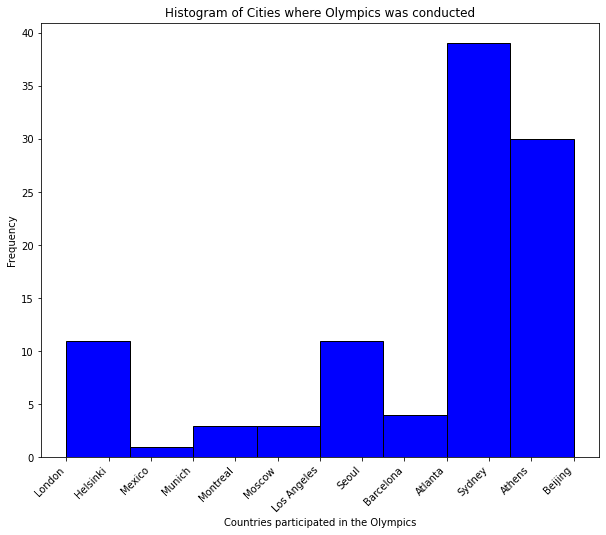

None

In [35]:
run.on_click(connection)
display(cities, run)
#display(years, cities, sports, disciplines, events, countries, genders, others, medals, data_visualization_basics, functions, data_visualization_functions, run)

In [47]:
def histogram(input_df):
    plt.figure(figsize=(10, 8))
    plt.hist(input_df["City"], bins='auto', color='b', edgecolor='black')
    #axis.set_xticklabels(axis.get_xticks(), rotation=45, ha='right')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Countries participated in the Olympics')
    plt.ylabel('Frequency')
    plt.title('Histogram of Cities where Olympics was conducted')
    return plt.show()

In [30]:
df[df['City'] == 'Berlin']

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6330,Berlin,1936,Aquatics,Diving,"STORK, Hermann",GER,Men,10m platform,M,Bronze
6331,Berlin,1936,Aquatics,Diving,"WAYNE, Marshall",USA,Men,10m platform,M,Gold
6332,Berlin,1936,Aquatics,Diving,"ROOT, Elbert Alonzo",USA,Men,10m platform,M,Silver
6333,Berlin,1936,Aquatics,Diving,"KÖHLER, Käthe",GER,Women,10m platform,W,Bronze
6334,Berlin,1936,Aquatics,Diving,"POYNTON-HILL, Dorothy",USA,Women,10m platform,W,Gold
...,...,...,...,...,...,...,...,...,...,...
7200,Berlin,1936,Wrestling,Wrestling Gre-R,"JOHANSSON, Ivar",SWE,Men,72 - 79kg (middleweight),M,Gold
7201,Berlin,1936,Wrestling,Wrestling Gre-R,"SCHWEIKERT, Ludwig",GER,Men,72 - 79kg (middleweight),M,Silver
7202,Berlin,1936,Wrestling,Wrestling Gre-R,"NEO, Ago (August)",EST,Men,79 - 87kg (light-heavyweight),M,Bronze
7203,Berlin,1936,Wrestling,Wrestling Gre-R,"CADIER, Axel",SWE,Men,79 - 87kg (light-heavyweight),M,Gold


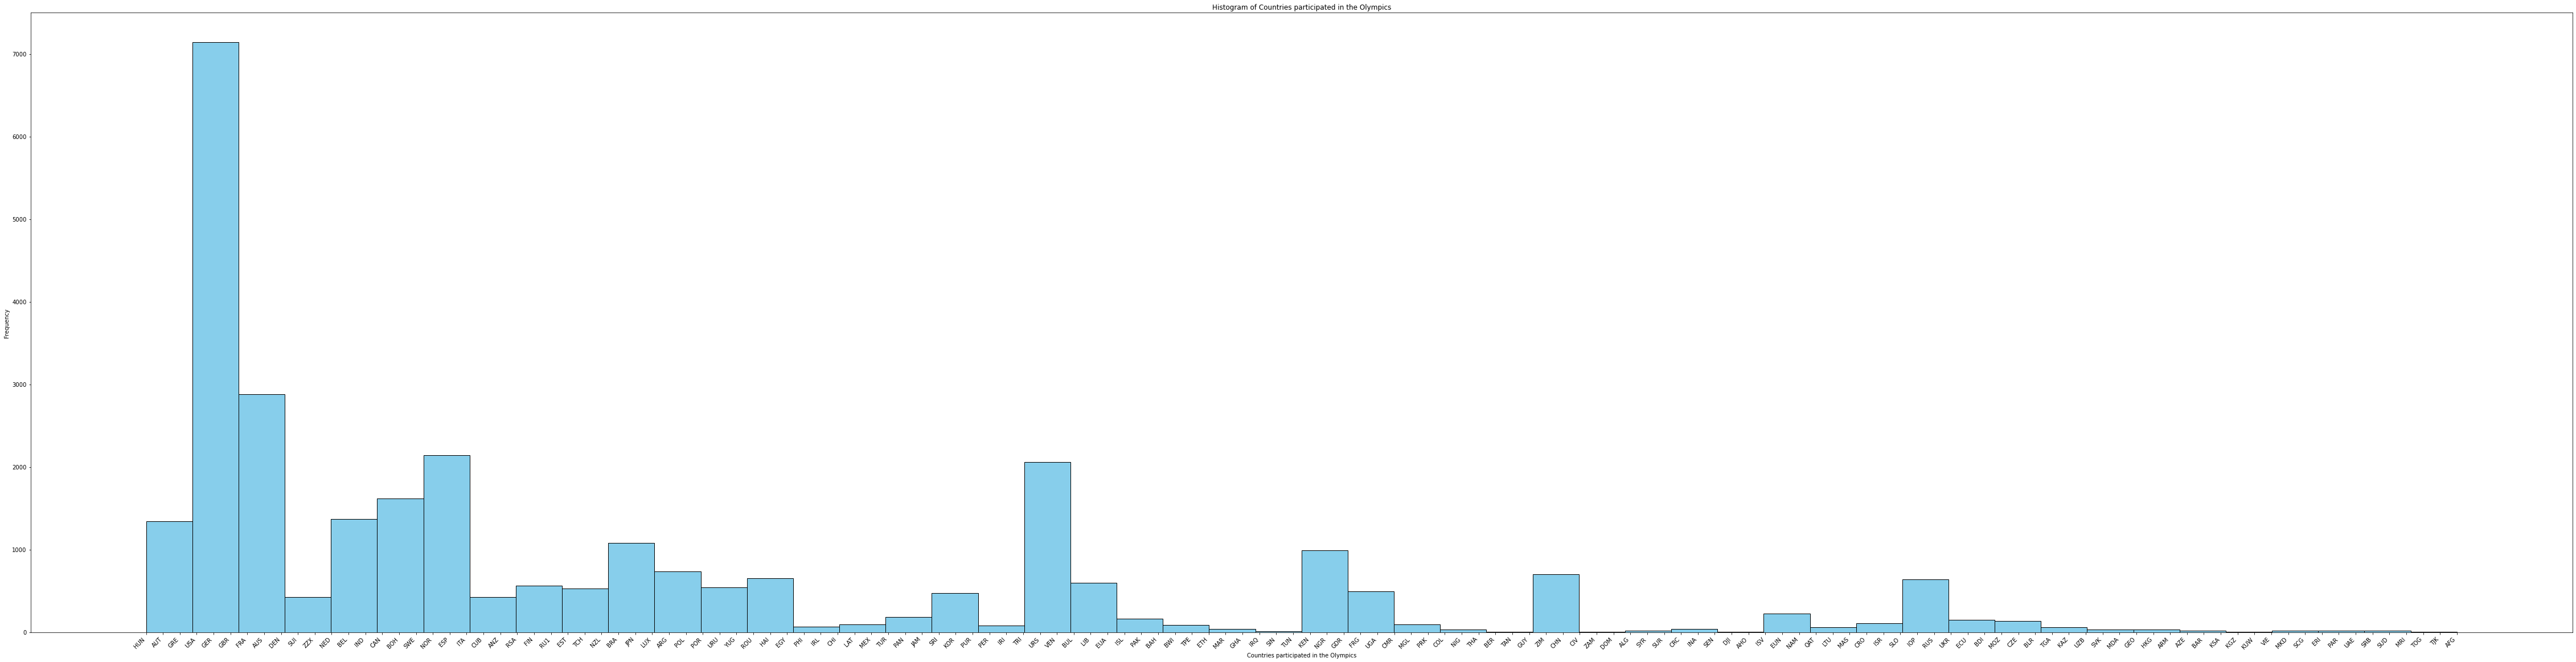

In [56]:
plt.figure(figsize=(80, 20))
plt.hist(df['NOC'], bins='auto', color='skyblue', edgecolor='black')
#axis.set_xticklabels(axis.get_xticks(), rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Countries participated in the Olympics')
plt.ylabel('Frequency')
plt.title('Histogram of Countries participated in the Olympics')
plt.show()

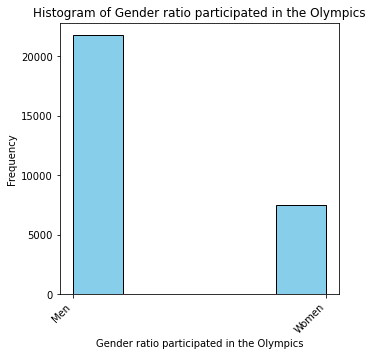

In [57]:
plt.figure(figsize=(5, 5))
plt.hist(df['Gender'], bins=5, color='skyblue', edgecolor='black')
#axis.set_xticklabels(axis.get_xticks(), rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Gender ratio participated in the Olympics')
plt.ylabel('Frequency')
plt.title('Histogram of Gender ratio participated in the Olympics')
plt.show()

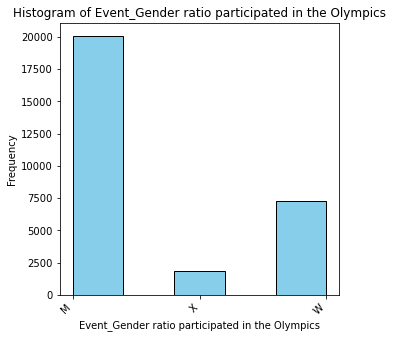

In [60]:
plt.figure(figsize=(5, 5))
plt.hist(df['Event_gender'], bins=5, color='skyblue', edgecolor='black')
#axis.set_xticklabels(axis.get_xticks(), rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Event_Gender ratio participated in the Olympics')
plt.ylabel('Frequency')
plt.title('Histogram of Event_Gender ratio participated in the Olympics')
plt.show()

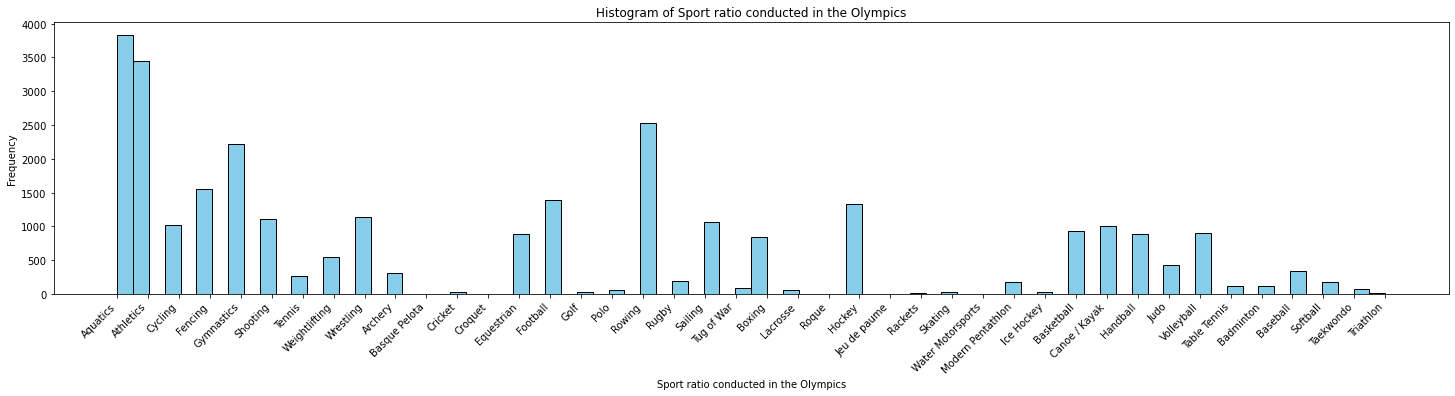

In [61]:
plt.figure(figsize=(25, 5))
plt.hist(df['Sport'], bins=80, color='skyblue', edgecolor='black')
#axis.set_xticklabels(axis.get_xticks(), rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sport ratio conducted in the Olympics')
plt.ylabel('Frequency')
plt.title('Histogram of Sport ratio conducted in the Olympics')
plt.show()

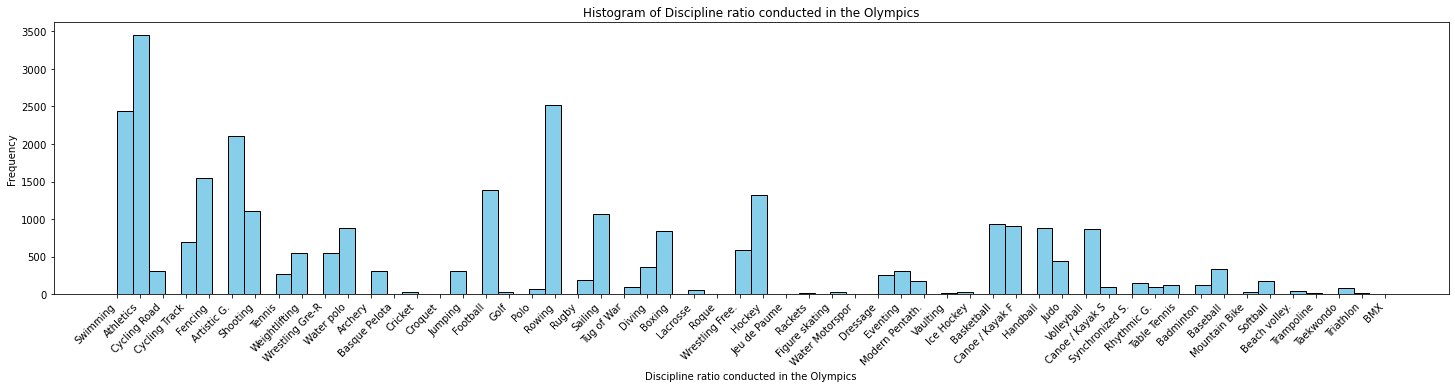

In [62]:
plt.figure(figsize=(25, 5))
plt.hist(df['Discipline'], bins=80, color='skyblue', edgecolor='black')
#axis.set_xticklabels(axis.get_xticks(), rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Discipline ratio conducted in the Olympics')
plt.ylabel('Frequency')
plt.title('Histogram of Discipline ratio conducted in the Olympics')
plt.show()

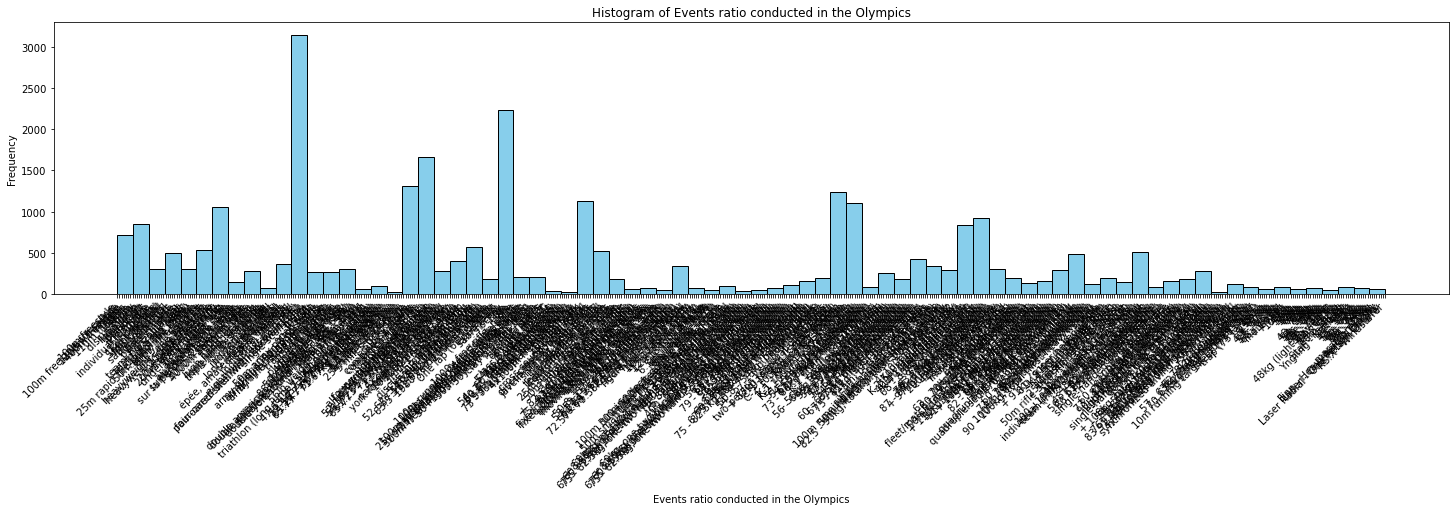

In [63]:
plt.figure(figsize=(25, 5))
plt.hist(df['Event'], bins=80, color='skyblue', edgecolor='black')
#axis.set_xticklabels(axis.get_xticks(), rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Events ratio conducted in the Olympics')
plt.ylabel('Frequency')
plt.title('Histogram of Events ratio conducted in the Olympics')
plt.show()

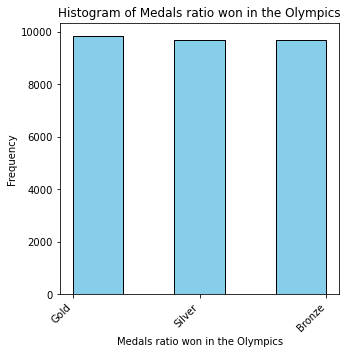

In [64]:
plt.figure(figsize=(5, 5))
plt.hist(df['Medal'], bins=5, color='skyblue', edgecolor='black')
#axis.set_xticklabels(axis.get_xticks(), rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Medals ratio won in the Olympics')
plt.ylabel('Frequency')
plt.title('Histogram of Medals ratio won in the Olympics')
plt.show()

# Bokeh plot

In [36]:
from bokeh.palettes import Spectral5
from bokeh.plotting import figure, show
#from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

In [83]:
df_new3 = df.iloc[20000::]  # Select only rows that contains year 1992 to 2008
df_new1 = df.iloc[0:10000]
df_new2 = df.iloc[10000:20000]

In [90]:
#group = df_new3.groupby(['Edition', 'NOC'])
group = df.groupby(['Edition', 'NOC'])
group

# Check which country has won more medals in which year

In [101]:
group1 = df_new1.groupby(['Edition', 'NOC'])

index_cmap = factor_cmap('Edition_NOC', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="count of teams participated in olympics",
           x_range=group1, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, NOC", "@Edition_NOC")])

p.vbar(x='Edition_NOC', top='Medal_count', width=1, source=group1,
       line_color="white", fill_color=index_cmap )


p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the teams in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)





In [102]:
group2 = df_new2.groupby(['Edition', 'NOC'])

index_cmap = factor_cmap('Edition_NOC', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="count of teams participated in olympics",
           x_range=group2, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, NOC", "@Edition_NOC")])

p.vbar(x='Edition_NOC', top='Medal_count', width=1, source=group2,
       line_color="white", fill_color=index_cmap )


p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the teams in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

In [103]:
group3 = df_new3.groupby(['Edition', 'NOC'])

index_cmap = factor_cmap('Edition_NOC', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="count of teams participated in olympics",
           x_range=group3, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, NOC", "@Edition_NOC")])

p.vbar(x='Edition_NOC', top='Medal_count', width=1, source=group3,
       line_color="white", fill_color=index_cmap )

p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the teams in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

# Check which gender won more medals

In [100]:
group1 = df_new1.groupby(['Edition', 'Gender'])

index_cmap = factor_cmap('Edition_Gender', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="count of gender won more medals in olympics",
           x_range=group1, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, Gender", "@Edition_Gender")])


p.vbar(x='Edition_Gender', top='Medal_count', width=1, source=group1,
       line_color="white", fill_color=index_cmap )

p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the teams in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)





In [99]:
group2 = df_new2.groupby(['Edition', 'Gender'])

index_cmap = factor_cmap('Edition_Gender', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="count of gender won more medals in olympics",
           x_range=group2, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, Gender", "@Edition_Gender")])

p.vbar(x='Edition_Gender', top='Medal_count', width=1, source=group2,
       line_color="white", fill_color=index_cmap )


p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the teams in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

In [98]:
group3 = df_new3.groupby(['Edition', 'Gender'])

index_cmap = factor_cmap('Edition_Gender', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="count of gender won more medals in olympics",
           x_range=group3, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, Gender", "@Edition_Gender")])

p.vbar(x='Edition_Gender', top='Medal_count', width=1, source=group3,
       line_color="white", fill_color=index_cmap )

p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the teams in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)





# Check which Sport won more medals

In [104]:
group1 = df_new1.groupby(['Edition', 'Sport'])

index_cmap = factor_cmap('Edition_Sport', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="count of gender won more medals in olympics",
           x_range=group1, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, Sport", "@Edition_Sport")])


p.vbar(x='Edition_Sport', top='Medal_count', width=1, source=group1,
       line_color="white", fill_color=index_cmap )

p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the Sports in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)


In [105]:
group2 = df_new2.groupby(['Edition', 'Sport'])

index_cmap = factor_cmap('Edition_Sport', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="count of gender won more medals in olympics",
           x_range=group2, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, Sport", "@Edition_Sport")])


p.vbar(x='Edition_Sport', top='Medal_count', width=1, source=group2,
       line_color="white", fill_color=index_cmap )

p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the Sports in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

In [106]:
group3 = df_new3.groupby(['Edition', 'Sport'])

index_cmap = factor_cmap('Edition_Sport', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="count of gender won more medals in olympics",
           x_range=group3, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, Sport", "@Edition_Sport")])


p.vbar(x='Edition_Sport', top='Medal_count', width=1, source=group3,
       line_color="white", fill_color=index_cmap )

p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the Sports in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

# Check which Events won more medals

In [108]:
group1 = df_new1.groupby(['Edition', 'Event'])

index_cmap = factor_cmap('Edition_Event', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="Number of medals won by the Sports in Olympics",
           x_range=group1, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, Event", "@Edition_Event")])


p.vbar(x='Edition_Event', top='Medal_count', width=1, source=group1,
       line_color="white", fill_color=index_cmap )

p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the Sports in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)


In [109]:
group2 = df_new2.groupby(['Edition', 'Event'])

index_cmap = factor_cmap('Edition_Event', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="Number of medals won by the Sports in Olympics",
           x_range=group2, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, Event", "@Edition_Event")])


p.vbar(x='Edition_Event', top='Medal_count', width=1, source=group2,
       line_color="white", fill_color=index_cmap )

p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the Sports in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

In [110]:
group3 = df_new3.groupby(['Edition', 'Event'])

index_cmap = factor_cmap('Edition_Event', palette=Spectral5, factors=sorted(df.Edition.unique()), end=1)

p = figure(width=800, height=300, title="Number of medals won by the Sports in Olympics",
           x_range=group3, toolbar_location=None, tooltips=[("Medal", "@Medal_count"), ("Edition, Event", "@Edition_Event")])


p.vbar(x='Edition_Event', top='Medal_count', width=1, source=group3,
       line_color="white", fill_color=index_cmap )

p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Number of medals won by the Sports in Olympics"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)